# Implementation of Simple Linear Classifier Model in TensorFlow (TF)

#### In practice of the tensorflow library, I wanted to implement a simple linear classifier within context.

## Import Libraries

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Generate two classes of random points in a 2D plane

In [3]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0, 3],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)


### Stack two calsses into array

In [4]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

### Generating the corresponding targets (0 and 1)

In [5]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype= 'float32'),
                     np.ones((num_samples_per_class, 1), dtype= 'float32'),))

### Plot the two classes

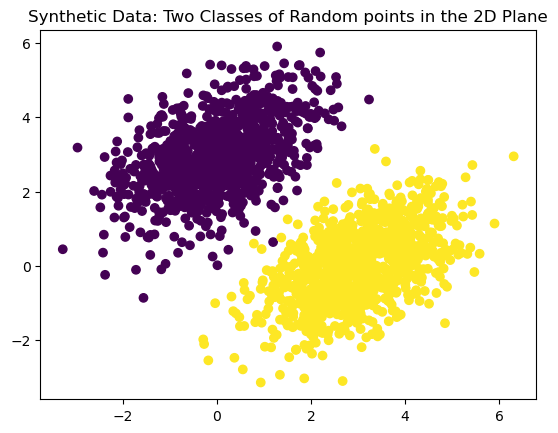

In [9]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.title("Synthetic Data: Two Classes of Random points in the 2D Plane")
plt.show()

## Create the Linear Classifier

### Create classifier variables

In [10]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

### Create forward pass function

In [11]:
def model(inputs):
    return tf.matmul(inputs, W) + b

### Evaluation : mean squared error loss function

In [13]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses) #average into a single scalar loss value

### Training step function

In [14]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

### Batch Training Loop (Employ Batch Gradient Descent for simplicity)

Loss at step 0: 0.0255
Loss at step 1: 0.0255
Loss at step 2: 0.0255
Loss at step 3: 0.0255
Loss at step 4: 0.0255
Loss at step 5: 0.0255
Loss at step 6: 0.0255
Loss at step 7: 0.0255
Loss at step 8: 0.0255
Loss at step 9: 0.0255
Loss at step 10: 0.0255
Loss at step 11: 0.0255
Loss at step 12: 0.0255
Loss at step 13: 0.0255
Loss at step 14: 0.0255
Loss at step 15: 0.0255
Loss at step 16: 0.0255
Loss at step 17: 0.0255
Loss at step 18: 0.0255
Loss at step 19: 0.0255
Loss at step 20: 0.0255
Loss at step 21: 0.0255
Loss at step 22: 0.0255
Loss at step 23: 0.0255
Loss at step 24: 0.0255
Loss at step 25: 0.0255
Loss at step 26: 0.0255
Loss at step 27: 0.0255
Loss at step 28: 0.0255
Loss at step 29: 0.0255
Loss at step 30: 0.0255
Loss at step 31: 0.0255
Loss at step 32: 0.0255
Loss at step 33: 0.0255
Loss at step 34: 0.0255
Loss at step 35: 0.0255
Loss at step 36: 0.0255
Loss at step 37: 0.0255
Loss at step 38: 0.0255
Loss at step 39: 0.0255
Loss at step 40: 0.0255
Loss at step 41: 0.0255
Lo

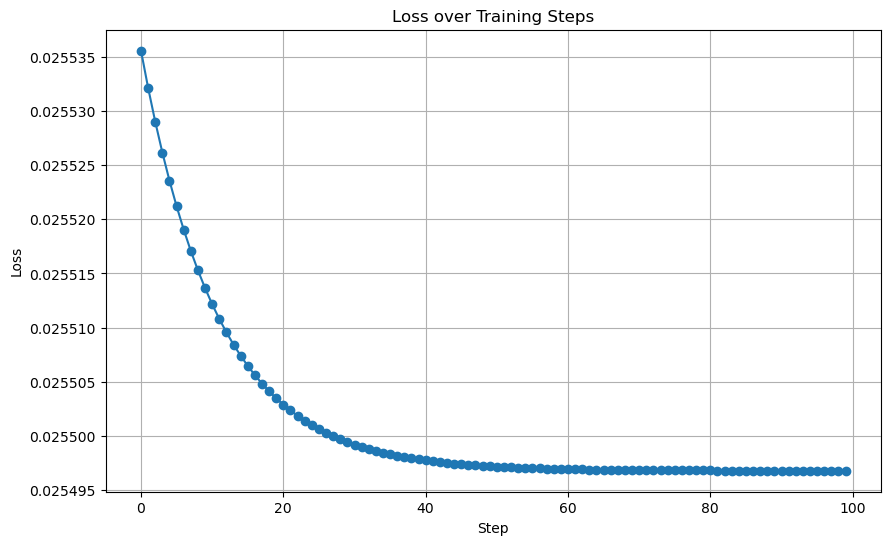

In [17]:
steps = []
losses = []

# Training Loop
for step in range(100):
    loss = training_step(inputs, targets)
    steps.append(step)
    losses.append(loss)
    print(f"Loss at step {step}: {loss:.4f}")

# Plot losses over steps
plt.figure(figsize=(10,6))
plt.plot(steps, losses, marker='o')
plt.title('Loss over Training Steps')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

## Plot Results (Successful implementation!)

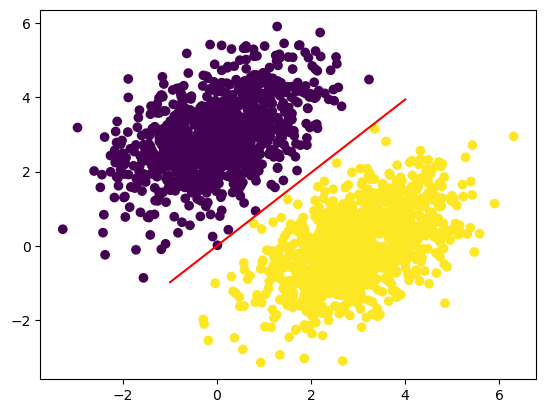

In [20]:
predictions = model(inputs)

# plot 2D plane
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1] 
plt.plot(x, y, "-r")

# plot colored predictions
plt.scatter(inputs[:,0], inputs[:, 1], c= predictions[:, 0] > 0.5)

plt.show()